
## **Introduction**

The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

## **Gathering data**

* Twitter archive file: download this file manually by clicking the following link: twitter_archive_enhanced.csv

* The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

* Twitter API & JSON: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from PIL import Image
from io import BytesIO
from timeit import default_timer as timer

## **Dataset 1:**

Download the file manually then read into a dataframe with an appropriate name using the pandas library.



In [2]:
#Read given CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_1 = twitter_archive

## **Dataset 2:**

* Downloaded programmatically using the Requests library and the provided URL.
* Store the data to anew file with name extracted from the URL.
* read the data and assign it to a new data frame.


In [3]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
df_2 = pd.read_csv('image-predictions.tsv', sep='\t' )

## Dataset 3:
* Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library.
* Store each tweet's entire set of JSON data in a file called tweet_json.txt file.
* Each tweet's JSON data should be written to its own line and seprated by '\n'.
* Because of there may be some deleted tweets for which no status would be found then try-except statment should be used to avoid exceptions.
* append such not found tweet_ids to an empty list to know how many tweets in * * archive data set was not found.
Read this tweet_json.txt file line by line.
* convert string type to list of dictionaries data structur.
* Extract data required as per project requirement
* DataFrame contains tweet ID,retweet count, and favorite count

In [4]:
consumer_key = 'ze5UwTGPUiTR3H2LaId1XD2Cc'
consumer_secret = 'cu9kNqWxWbPZppEFFU92tjSm2KYrEXdwFd1oXGtEazUAwtpGGG'
access_token = '2377001329-PHuQruOKBQaFDJ4ryTOuROTfLy5CUpBdrfHDJus'
access_secret = 'hkVd1MBhHG9DOniy98PezCeLwDFZdjNTIBchHWCABEGZj'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_list = []
start = timer()
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, file) # Save each tweet's returned JSON as a new line in a .txt file
                file.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_list.append(tweet_id)
                pass
end = timer()

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [5]:
df3_list = []
with open ('tweet_json.txt',"r") as j_file:
    for l in j_file:
        dic = {}
        data=json.loads(l)
        dic['id'] = data['id']
        dic['favorite_count'] = data['favorite_count']
        dic['retweet_count'] = data['retweet_count']
        dic['followers_count'] = data['user']['followers_count']
        df3_list.append(dic)
print(data.keys())

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [6]:
df_3 = pd.DataFrame(df3_list,columns = ['id','retweet_count','favorite_count','followers_count',])

In [7]:
df_3.to_csv('tweet1.csv')

In [8]:
df_3 = pd.read_csv('tweet1.csv')
len(df_3)

2327

## ***Datasets Assesment***

### Dataset 1(df_1)

In [9]:
df_1.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
1154,725458796924002305,NaN,NaN,2016-04-27 22:57:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pup had to be removed cuz it wouldn't have bee...,NaN,NaN,NaN,https://twitter.com/foxdeportes/status/7251360...,13,10,None,None,None,None,None
1917,674291837063053312,NaN,NaN,2015-12-08 18:17:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenny. He just wants to be included in...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674291837...,11,10,Kenny,None,None,None,None
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None


In [10]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_1.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
            ... 
Swagger        1
Jebberson      1
Emmie          1
Bodie          1
Oddie          1
Name: name, Length: 957, dtype: int64

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 


### Dataset 2 (df_2)

In [13]:
df_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1311,754449512966619136,https://pbs.twimg.com/media/CnhXzpvW8AAQ1MB.jpg,1,beagle,0.858513,True,basset,0.076012,True,English_foxhound,0.016246,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
1138,729113531270991872,https://pbs.twimg.com/media/Ch5U4FzXEAAShhF.jpg,2,stone_wall,0.606188,False,prison,0.064831,False,bannister,0.048048,False
533,676897532954456065,https://pbs.twimg.com/media/CWTSt0UW4AALMNB.jpg,1,hamster,0.628255,False,guinea_pig,0.318646,False,macaque,0.013058,False
1312,754482103782404096,https://pbs.twimg.com/ext_tw_video_thumb/75448...,1,tub,0.596796,False,bathtub,0.381098,False,shower_curtain,0.017629,False


In [14]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
df_2.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Dataset 3 (df_3)

In [17]:
df_3.sample(5)

,Unnamed: 0,id,retweet_count,favorite_count,followers_count
165,165,858843525470990336,3120,14458,9008765
966,966,748568946752774144,637,2111,9008769
292,292,835685285446955009,7694,0,9008765
528,528,805520635690676224,1604,5619,9008765
1225,1225,710833117892898816,501,2546,9008768


In [18]:
df_3.describe()

,Unnamed: 0,id,retweet_count,favorite_count,followers_count
count,2327.00000,2.327000e+03,2327.000000,2327.000000,2.327000e+03
mean,1163.00000,7.418020e+17,2549.423292,7235.803180,9.008761e+06
std,671.89136,6.822107e+16,4316.453005,11242.676192,3.788470e+01
min,0.00000,6.660209e+17,1.000000,0.000000,9.008728e+06
25%,581.50000,6.781394e+17,516.000000,1257.000000,9.008764e+06
50%,1163.00000,7.178418e+17,1185.000000,3131.000000,9.008765e+06
75%,1744.50000,7.986547e+17,2953.000000,8836.000000,9.008769e+06
max,2326.00000,8.924206e+17,73080.000000,148696.000000,9.009163e+06


In [19]:
df_3.followers_count.value_counts()

9008765    717
9008769    409
9008730    311
9008770    257
9008764    154
9008771    115
9008768    108
9008729     83
9008731     77
9008728     70
9008732      8
9009146      3
9009145      3
9009141      3
9009162      3
9009144      2
9009163      1
9009147      1
9009160      1
9009161      1
Name: followers_count, dtype: int64

## **Quality Issues:**

* As per the project requirements; only original ratings (no retweets) that have images should be included.
* Columns of retweeted_status_id and its related data have entries which not part of our analysis.
* Inaccurate data in name 'a' represented 55 times.
* Inaccurate data in rating_nominator and df_denominator.
* Null values reprsened as "None" in columns doggo, floofer, pupper, puppo.
* Invalid dtype in timestamp represented as object type.
* Column tweet_id represented as int64 across all data set. 
* Columns of predictions have lables represented as letters.
* Column 'p1_dog' have 543 false prediction, p2_dog have 522 false prediction, p3_dog have 576 false prediction.
* Column 'p1' have invalid data like(china_cabinet, shield, orange, walking_stick,...etc).
* Column 'p2' have invalid data like(ice_lolly, Japanese_spaniel, china_cabinet, necklace,...etc).
* Column 'p3' have invalid data like(kimono, cab, axolotl, passenger_car, tripod, grocery_store,...etc).
### **Tidness Issues:**
* Variable dog stages have four columns. df_2:
* Variable prediction have three columns. df_3:
* Table df3_clean have same observation unit that in df1_clean.
* Column name id in stead of tweet_id.

## **Dataset Cleaning**

Befor cleaning copying DataFrames in pandas is done using ".copy" method



In [20]:
df1_clean = df_1.copy()
df1_clean.shape

(2356, 17)

In [21]:
df2_clean = df_2.copy()
df2_clean.shape

(2075, 12)

In [22]:
df3_clean = df_3.copy()
df3_clean.shape

(2327, 5)

### Define

###### df3_clean Column name 'id' in stead of 'tweet_id'.



In [23]:
df3_clean.rename(columns={'id': 'tweet_id'},inplace =True)

### Test

In [24]:
df3_clean.sample()

,Unnamed: 0,tweet_id,retweet_count,favorite_count,followers_count
1845,1845,675135153782571009,428,1206,9008729


### Define

###### Null values reprsened as "None" in columns doggo, floofer, pupper, puppo.

use replace function to replace it with""

In [25]:
df1_clean.iloc[:,-4:] = df1_clean.iloc[:,-4:].replace('None','')

### Test

In [26]:
print(df1_clean.shape)
df1_clean.loc[:,['doggo','pupper','floofer','puppo']].sample(5)

(2356, 17)


,doggo,pupper,floofer,puppo
154,,,,
2003,,,,
1865,,,,
515,,pupper,,
1992,,pupper,,


### Define

###### Variable dog stages have four columns
* Creat a new column 'dog_stages' that contain all stages of every dog.
* Drop the old columns

In [27]:
df1_clean['dog_stages'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo

In [28]:
df1_clean.drop(columns =['doggo', 'floofer', 'pupper', 'puppo'] , inplace = True)

### Test

In [29]:
df1_clean.shape

(2356, 14)

### Define
###### Inaccurate data in name 'a' represented 55 times.

Extract the correct name using REG expression

In [30]:
short_name = df1_clean [df1_clean.name.str.len() < 3 ]
short_name.name

56       a
393     Mo
446     Bo
449     Bo
553     Bo
        ..
2349    an
2350     a
2352     a
2353     a
2354     a
Name: name, Length: 79, dtype: object

In [31]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in df1_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('an', c_name)
        elif row['name'] == 'O':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('O', c_name)
        elif row['name'] == 'Al':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('Al', c_name)
        elif row['name'] == 'my':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('my', c_name)
        elif row['name'] == 'by':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('by', c_name)
        elif row['name'] == 'Ed':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('Ed', c_name)
        elif row['name'] == 'Jo':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('Jo', c_name)
        elif row['name'] == 'JD':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('JD', c_name)
        elif row['name'] == 'None':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('None', c_name)
        elif row['name'] == "Mo":
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('Mo', c_name)
        elif row['name'] == 'Bo':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('Bo', c_name)
        elif row['name'] == 'to':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('to', c_name)
    except IndexError:
        df1_clean.loc[index,'name'] = np.nan

### Test

In [32]:
# Test for short name
short_name = df1_clean [df1_clean.name.str.len() < 3 ]
short_name.name

149     to
2086    of
Name: name, dtype: object

In [33]:
# Test for None 
(df1_clean.name=='None').sum()

0

### Define

As per the project requirements; only original ratings (no retweets) that have images should be included


In [34]:
#Use the image_prediction table to guide the selection and removal of tweets without images in the archive table
tweets_with_image = list(df2_clean.tweet_id.unique())
len(tweets_with_image)

2075

In [35]:
# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == df1_clean.tweet_id.isin(tweets_with_image).sum()

True

In [36]:
# Cleaning df1_clean
df1_clean = df1_clean[df1_clean.tweet_id.isin(tweets_with_image)]

### Test

In [37]:
print(df1_clean.shape)
print(df2_clean.shape)
print(df3_clean.shape)
df1_clean.shape[0] == df2_clean.shape[0]

(2075, 14)
(2075, 12)
(2327, 5)


True

### Define

###### Columns of retweeted_status_id and its related data have entries which not part of our analysis.

###### Use its notnull data to drop retweets and replies then drop it all in df1_clean and df3_clean.

In [38]:
# extract the tweets that include data in the retweet_status_id.
retweet_entries = df1_clean.retweeted_status_id.notnull()
df1_clean[retweet_entries].shape[0]

81

In [39]:
# Dropping the retweets from the archive data set
df1_clean = df1_clean[~retweet_entries]

In [40]:
# Extracting replies entries with the same method as the retweets
reply_entries = df1_clean.in_reply_to_status_id.notnull()
df1_clean[reply_entries].shape[0]

23

In [41]:
# Dropping the replies from the df1_clean set
df1_clean = df1_clean[~reply_entries]

In [42]:
# Check the image_prediction table df2_clean for extra tweet ids not in the df1_clean
np.logical_not(df2_clean.tweet_id.isin(list(df1_clean.tweet_id))).sum()

104

In [43]:
# Dropping the retweets and replies ids from the image prediction dataframe df2_clean
df2_clean = df2_clean[~np.logical_not(df2_clean.tweet_id.isin(list(df1_clean.tweet_id)))]

In [44]:
# Check the df3_clean table for extra tweet ids not in the df1_clean
np.logical_not(df3_clean.tweet_id.isin(list(df1_clean.tweet_id))).sum()

365

In [45]:
# Dropping the retweets and replies ids from the dataframe df3_clean
df3_clean = df3_clean[~np.logical_not(df3_clean.tweet_id.isin(list(df1_clean.tweet_id)))]

In [46]:
#Dropping columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1,inplace=True)

### Test

In [47]:
print(df1_clean.shape)
print(df2_clean.shape)
print(df3_clean.shape)

(1971, 9)
(1971, 12)
(1962, 5)


In [48]:
print((df1_clean[retweet_entries].shape[0])==0)
print((df1_clean[reply_entries].shape[0])==0)
print(np.logical_not((df2_clean.tweet_id.isin(list(df1_clean.tweet_id))).sum())==0)

True
True
True


In [49]:
df1_clean = df1_clean.reset_index(drop=True)
df1_clean.index

RangeIndex(start=0, stop=1971, step=1)

In [50]:
df2_clean = df2_clean.reset_index(drop=True)
df2_clean.index

RangeIndex(start=0, stop=1971, step=1)

In [51]:
df3_clean = df3_clean.reset_index(drop=True)
df3_clean.index

RangeIndex(start=0, stop=1962, step=1)

In [52]:
df1_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
1818,668779399630725120,2015-11-23 13:13:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevon. He is not physically or mentall...,https://twitter.com/dog_rates/status/668779399...,10,10,Kevon,
1331,681891461017812993,2015-12-29 17:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,pupper


In [53]:
df2_clean.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1756,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,True,doormat,0.139994,False,dalmatian,0.13282,True
155,668852170888998912,https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg,1,golden_retriever,0.903529,True,Tibetan_mastiff,0.041497,True,kuvasz,0.02250,True


In [54]:
df3_clean.sample(2)

,Unnamed: 0,tweet_id,retweet_count,favorite_count,followers_count
82,98,872820683541237760,3245,13380,9008764
1350,1683,680497766108381184,1798,3999,9008771


### Define

Invalid dtype in timestamp represented as object type

In [55]:
#convert timestamp to date time type 
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

### Test

In [56]:
df1_clean.timestamp.dtypes

datetime64[ns, UTC]

### Define
Inaccurate data in rating_numerator and df_denominator.

The denominator should always be 10 but some aren't in all cases So dividing by it or not doesn't mattar.

we are going to drop denominator later and just use the rating_numerator as the rating value.

some rating extracted incorrectly
* Extract it with REGS

Most images with more than dog have denominator greater than 10 and numerator greater than 20.
* Calculating the dogs counts in the tweets featuring many dogs by dividing denominator/10
* Calculating the rating_numerator for images with more than one dog counts by dividing numerator/dogs counts

Investigate each outlier individually through its image found some images not a dog and some not found and those will be dropped:
* Drop rows


In [57]:
#try to extract correct rating with REGS
df1_clean['rating_numerator'] = df1_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')

In [58]:
#check for incorrect rating assume that over rated numerator more than 20
inaccurat_rating = df1_clean[df1_clean.rating_numerator>20][['tweet_id','rating_numerator']]
inaccurat_rating

,tweet_id,rating_numerator
320,820690176645140481,84.0
382,810984652412424192,24.0
658,758467244762497024,165.0
722,749981277374128128,1776.0
842,731156023742988288,204.0
918,716439118184652801,50.0
939,713900603437621249,99.0
963,710658690886586372,80.0
981,709198395643068416,45.0
1045,704054845121142784,60.0


In [59]:
# Calculating the dogs counts in the tweets featuring many dogs
dogs_count = df1_clean.rating_denominator[df1_clean.rating_numerator > 20 ]/10
print(dogs_count)

320      7.0
382      0.7
658     15.0
722      1.0
842     17.0
918      5.0
939      9.0
963      8.0
981      5.0
1045     5.0
1120     4.0
1288    11.0
1420    12.0
1478     8.0
1696     1.0
Name: rating_denominator, dtype: float64


In [60]:
df1_clean.loc[df1_clean.rating_numerator > 20, ['rating_numerator', 'rating_denominator']] = [inaccurat_rating.rating_numerator/dogs_count , 10]

In [61]:
#investigate incorrect rating and drop
inaccurat_rating = df1_clean[df1_clean.rating_numerator>20][['tweet_id','rating_numerator']]
inaccurat_rating

,tweet_id,rating_numerator
382,810984652412424192,34.285714
722,749981277374128128,1776.000000
1696,670842764863651840,420.000000


In [62]:
df1_clean = df1_clean.drop([382,722, 1696])

In [63]:
# Dropping the extra tweet ids from df2_clean not in the df1_clean
df2_clean = df2_clean[~np.logical_not(df2_clean.tweet_id.isin(list(df1_clean.tweet_id)))]

In [64]:
# Dropping the extra tweet ids from df3_clean not in the df1_clean
df3_clean = df3_clean[~np.logical_not(df3_clean.tweet_id.isin(list(df1_clean.tweet_id)))]

In [65]:
print(np.logical_not(df3_clean.tweet_id.isin(list(df1_clean.tweet_id))).sum())
print(np.logical_not(df3_clean.tweet_id.isin(list(df1_clean.tweet_id))).sum())

0
0


In [66]:
df1_clean = df1_clean.reset_index(drop=True)
df1_clean.index

RangeIndex(start=0, stop=1968, step=1)

In [67]:
df2_clean = df2_clean.reset_index(drop=True)
df2_clean.index

RangeIndex(start=0, stop=1968, step=1)

In [68]:
df3_clean = df3_clean.reset_index(drop=True)
df3_clean.index

RangeIndex(start=0, stop=1959, step=1)

### Test

In [69]:
df1_clean[df1_clean.rating_numerator>20][['tweet_id','rating_numerator']]

,tweet_id,rating_numerator


In [70]:
print(df1_clean.shape)
print(df2_clean.shape)
print(df3_clean.shape)

(1968, 9)
(1968, 12)
(1959, 5)


### Define

Column tweet_id represented as int64 across all data set

In [71]:
# Convret to str
df1_clean.loc[:,['tweet_id']] = df1_clean.loc[:,['tweet_id']].astype(np.int64).astype(str)
df2_clean.loc[:,['tweet_id']] = df2_clean.loc[:,['tweet_id']].astype(np.int64).astype(str)
df3_clean.loc[:,['tweet_id']] = df3_clean.loc[:,['tweet_id']].astype(np.int64).astype(str)

### Test

In [72]:
print(df1_clean.tweet_id.dtypes)
print(df2_clean.tweet_id.dtypes)
print(df3_clean.tweet_id.dtypes)

object
object
object


### Define

In [73]:
false_p1dog = df2_clean[df2_clean["p1_dog"]== False]

In [74]:
false_p2dog = false_p1dog[false_p1dog['p2_dog']==False]

In [75]:
false_p3dog = false_p2dog[false_p2dog['p3_dog']==False]

In [76]:
df2_clean = df2_clean.drop(false_p3dog.index,axis = 0)

In [77]:
df2_clean = df2_clean.reset_index(drop=True)
df2_clean.index

RangeIndex(start=0, stop=1665, step=1)

### Test

In [78]:
df2_clean.shape


(1665, 12)

### Define

One variable 'prediction' have three columns.

Columns of predictions have lables represented as letters.
* Use wide to long method to correct table tiddness issue

In [79]:
# Rename columns of dataframe
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
df2_clean.columns = cols

In [80]:
# Reshaping the dataframe
df2_clean= pd.wide_to_long(df2_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

### Test

In [81]:
df2_clean.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


### Define
Table df3_clean have same observation unit that in df1_clean.

* use merge function to make them one table called Twitter_archive_master

In [82]:
Twitter_archive_master = df1_clean.merge(df3_clean,how = 'inner',on = 'tweet_id')
Twitter_archive_master.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,Unnamed: 0,retweet_count,favorite_count,followers_count
797,738537504001953792,2016-06-03 01:07:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,https://twitter.com/dog_rates/status/738537504...,11.0,10,Bayley,puppo,1055,1441,4830,9008769


In [83]:
Twitter_archive_master.drop(['Unnamed: 0'], axis = 1, inplace = True)
Twitter_archive_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,followers_count
218,837110210464448512,2017-03-02 01:20:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,https://twitter.com/dog_rates/status/837110210...,13.0,10,Clark,pupper,2238,15449,9008765
1095,698635131305795584,2016-02-13 22:29:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing five Guatemalan Birch F...,https://twitter.com/dog_rates/status/698635131...,12.0,10,NaN,,323,1230,9008769
1269,684914660081053696,2016-01-07 01:49:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes I'll just get one of each color tha...",https://twitter.com/dog_rates/status/684914660...,12.0,10,NaN,,1368,3335,9008770


# **Store Data**

Export data as CSV file:

- Twitter_archive_master
- Image_prediction

In [84]:
Twitter_archive_master.to_csv('Twitter_archive_master.csv')

In [85]:
df2_clean.to_csv('Image_prediction.csv')

## **Data Analysis, Visualization & Data Reporting**

In [86]:
df1 = pd.read_csv('Twitter_archive_master.csv')
df2= pd.read_csv('Image_prediction.csv')

In [87]:
df1['timestamp']=pd.to_datetime(df1['timestamp'])
df1.sample()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,followers_count
1859,1859,667793409583771648,2015-11-20 19:55:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Dogs only please. Small cows and other non can...,https://twitter.com/dog_rates/status/667793409...,8.0,10,NaN,NaN,302,635,9008730


In [88]:
df2.sample()

,Unnamed: 0,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
4440,4440,840632337062862849,https://pbs.twimg.com/media/C6qGphPV4AEKrdc.jpg,1,1,golden_retriever,0.711148,True


In [89]:
df1.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count
count,1959.000000,1.959000e+03,1959.000000,1959.000000,1959.000000,1959.000000,1.959000e+03
mean,979.000000,7.357421e+17,10.528218,10.002042,2328.262889,7955.886677,9.008760e+06
std,565.658908,6.745337e+16,2.181958,0.291164,4167.922328,11724.936450,3.723375e+01
min,0.000000,6.660209e+17,0.000000,2.000000,11.000000,67.000000,9.008728e+06
25%,489.500000,6.758342e+17,10.000000,10.000000,518.500000,1691.500000,9.008731e+06
50%,979.000000,7.084797e+17,11.000000,10.000000,1124.000000,3575.000000,9.008765e+06
75%,1468.500000,7.875578e+17,12.000000,10.000000,2652.000000,9904.500000,9.008769e+06
max,1958.000000,8.924206e+17,14.000000,20.000000,73080.000000,148696.000000,9.009163e+06


In [90]:
df2.describe()

,Unnamed: 0,tweet_id,img_num,prediction_level,confidence
count,4995.000000,4.995000e+03,4995.000000,4995.000000,4.995000e+03
mean,2497.000000,7.394614e+17,1.214414,2.000000,2.681543e-01
std,1442.076628,6.800134e+16,0.573993,0.816578,2.931612e-01
min,0.000000,6.660209e+17,1.000000,1.000000,2.160900e-07
25%,1248.500000,6.775479e+17,1.000000,1.000000,5.254155e-02
50%,2497.000000,7.141414e+17,1.000000,2.000000,1.401730e-01
75%,3745.500000,7.931808e+17,1.000000,3.000000,3.919090e-01
max,4994.000000,8.921774e+17,4.000000,3.000000,9.999840e-01


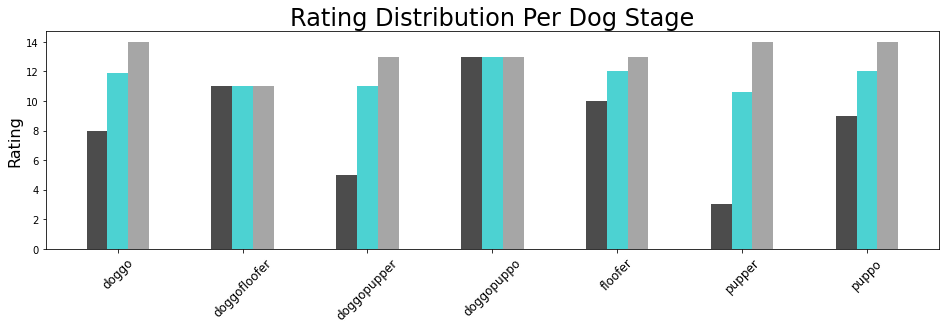

In [119]:
stage =  df1.groupby(['dog_stages'],as_index = True)
ind = np.arange(len(stage))  # the x locations for the groups
width = 0.5       # the width of the bars
labels =stage['rating_numerator'].count().index

stage_rating_max = stage ['rating_numerator'].max()
stage_rating_mean = stage['rating_numerator'].mean()
stage_rating_min =stage['rating_numerator'].min()

plt.figure(figsize=(16,4))

plt.bar(ind+width/3,stage_rating_max,color= 'grey',  width= width/3, alpha = .7);
plt.bar(ind,stage_rating_mean,color= 'c', width= width/3, alpha = .7);
plt.bar(ind-width/3,stage_rating_min,color= 'black', width= width/3, alpha = .7);


plt.title('Rating Distribution Per Dog Stage',size = 24)
plt.ylabel('Rating' ,color='black', size=16);
plt.xticks(ticks= ind, labels=labels, fontsize=12,rotation=45);


The above figure show "rating distribution" for each "dog stage". e.g the mean of "doggopuppo" the highest while the "pupper" is the lowest.

In [92]:
stage['rating_numerator'].count()

dog_stages
doggo            62
doggofloofer      1
doggopupper       8
doggopuppo        1
floofer           7
pupper          201
puppo            22
Name: rating_numerator, dtype: int64

Both stages "doggopuppo" and "doggofloofer" only have one observation

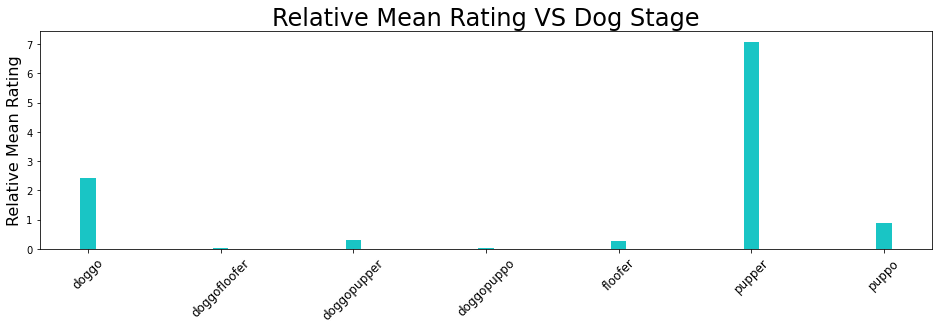

In [116]:
stage_rating_count = stage.rating_numerator.count()

total_rating_count =stage.rating_numerator.count().sum()

proportion = stage_rating_count/total_rating_count

stage_rating_proportion = stage_rating_mean * proportion

plt.figure(figsize=(16,4))

plt.bar(ind,stage_rating_proportion,color='c', width=width/3,alpha=.9);

plt.title('Relative Mean Rating VS Dog Stage',size = 24)
plt.ylabel('Relative Mean Rating' ,color='black', size=16);
plt.xticks(ticks= ind, labels=labels, fontsize=12, rotation=45);

The Relative Mean Rating which you can compare stages to each other.
That prove the point that relative mean of "doggopuppo" the lowest while for the "pupper" is the highest.


In [94]:
stage ['favorite_count'].sum()

dog_stages
doggo           1119550
doggofloofer      15229
doggopupper      104380
doggopuppo        42911
floofer           80619
pupper          1290248
puppo            441510
Name: favorite_count, dtype: int64

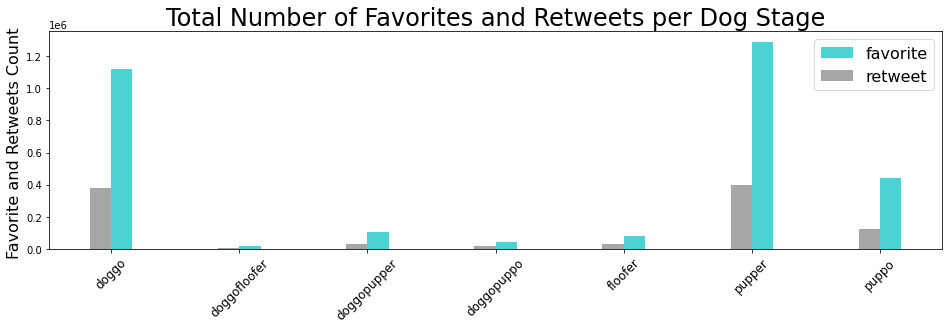

In [95]:
stage_total_favorite = stage ['favorite_count'].sum()

stage_total_retweet = stage['retweet_count'].sum()

plt.figure(figsize=(16,4))

plt.bar(ind+width/6,stage_total_favorite,color='c', width=width/3,alpha=.7,label='favorite');
plt.bar(ind-width/6,stage_total_retweet,color='grey', width=width/3,alpha=.7,label='retweet');

plt.title('Total Number of Favorites and Retweets per Dog Stage',size = 24)
plt.ylabel('Favorite and Retweets Count ' ,color='black', size=16);
plt.xticks(ticks= ind, labels=labels, fontsize=12, rotation=45);
plt.legend(fontsize=16);

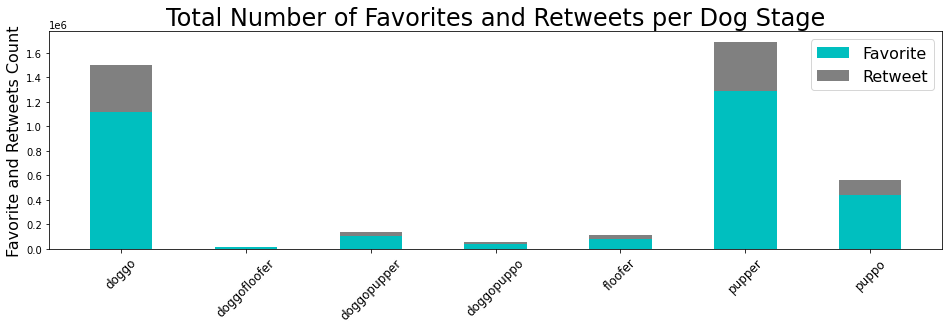

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 4)
ax.bar(labels, stage_total_favorite, width, label='Favorite', color = "c")
ax.bar(labels, stage_total_retweet, width, bottom=stage_total_favorite,label='Retweet',color='grey')

plt.title('Total Number of Favorites and Retweets per Dog Stage',size = 24)
plt.ylabel('Favorite and Retweets Count' ,color='black', size=16);
plt.xticks(ticks= ind, labels=labels, fontsize=12, rotation=45);
plt.legend(fontsize=16);
plt.show()

### Interaction over time which figure out the people engagement.

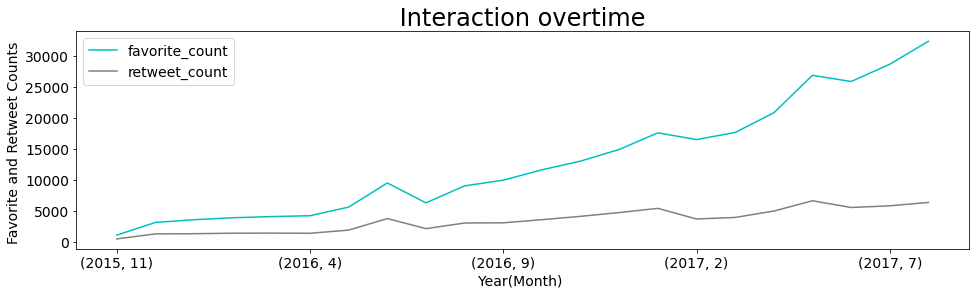

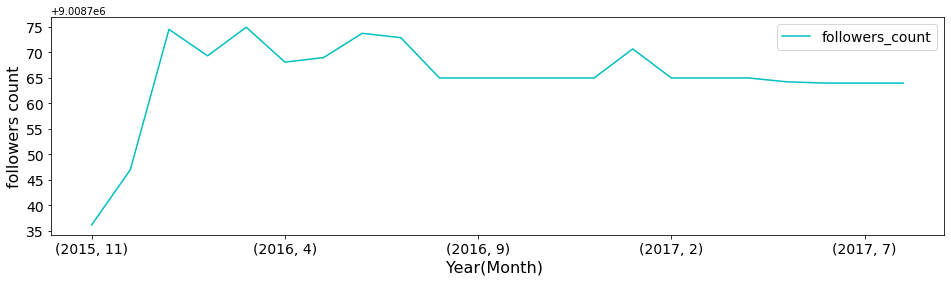

In [97]:
df1['year']=df1['timestamp'].dt.year
df1['month']=df1['timestamp'].dt.month
time = df1.groupby(['year','month'],as_index = True)
fav_time = time['favorite_count'].mean()
ret_time = time['retweet_count'].mean()
fol_time = time['followers_count'].mean()

plt.figure(figsize=(16,4))

fav_time.plot(kind='line',color='c',fontsize=14)
ret_time.plot(kind='line',color='grey',fontsize=14)


plt.title(' Interaction overtime ',size = 24)
plt.ylabel('Favorite and Retweet Counts ' , size=14);
plt.xlabel('Year(Month) ' , size=14);
plt.legend(fontsize=14);

plt.figure(figsize=(16,4))
fol_time.plot(kind='line',color='c',fontsize=14)

plt.ylabel('followers count' , size=16);
plt.xlabel('Year(Month) ' , size=16);
plt.legend(fontsize=14);


The Peopel interaction via favorits and retweets is growing as shown in the first figure.


### Image Prediction

In the following figure we Examin the second data set which show the confident destribution for various prediction level.

clearly it show that the first prediction has the most confident level

In [98]:
image = df2.groupby(['prediction_level'],as_index = True)
ind2 = np.arange(len(image))  # the x locations for the groups
width2 = 0.5     # the width of the bars
labels2 =image['prediction_level'].max().index

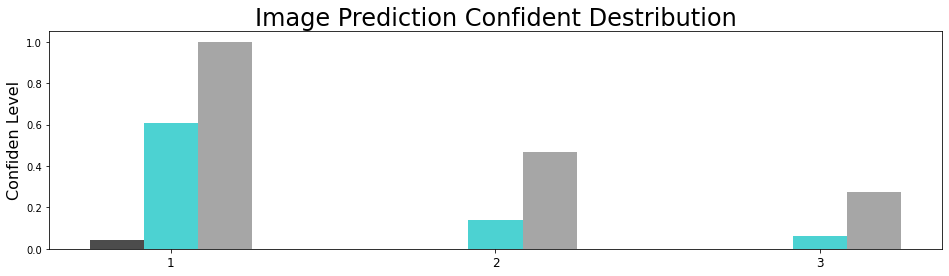

In [99]:
max_conf=image.confidence.max()
mean_conf=image.confidence.mean()
min_conf=image.confidence.min()

plt.figure(figsize=(16,4))

plt.bar(ind2+width2/3,max_conf,color= 'grey',  width= width2/3,alpha=.7);
plt.bar(ind2,mean_conf,color='c', width=width2/3,alpha=.7);
plt.bar(ind2-width2/3,min_conf,color='black', width=width2/3,alpha=.7);

plt.title('Image Prediction Confident Destribution',color='black',size = 24)
plt.ylabel('Confiden Level' ,color='black', size=16);
plt.xticks(ticks= ind2, labels=labels2, fontsize=12);

In [100]:
breed_count = df2.query('breed == True')\
.groupby('prediction').count()[['tweet_id']]\
.sort_values('tweet_id', ascending=False)[:20]
breed_count

,tweet_id
prediction,
Labrador_retriever,264
golden_retriever,263
Chihuahua,178
Pembroke,138
Cardigan,112
Pomeranian,103
toy_poodle,102
pug,92
chow,91


Text(0, 0.5, 'Count')

<Figure size 288x576 with 0 Axes>

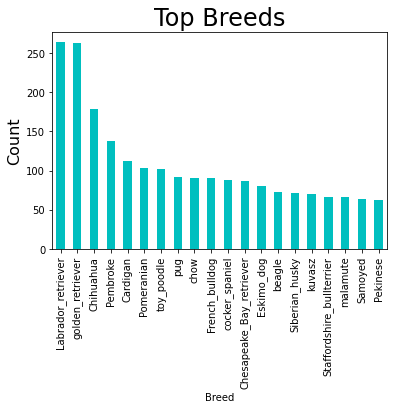

In [101]:
plt.figure(figsize=(4,8))
breed_count.plot(kind='bar', legend=False, color = "c")
plt.title("Top Breeds", color='black', size = 24)
plt.xlabel("Breed")
plt.ylabel("Count", color='BLACK', size=16)

In [102]:
df1.head(1)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,followers_count,year,month
0,0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,7229,34650,9008764,2017,8


In [103]:
## binning the hours using code found at
# https://stackoverflow.com/questions/55571311/get-part-of-day-morning-afternoon-evening-night-in-python-dataframe

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']

df1['session'] = pd.cut(df1['timestamp'].dt.hour, bins=b, labels=l, include_lowest=True)

In [104]:
df1.favorite_count.value_counts()


212      4
363      3
1310     3
1498     3
1979     3
        ..
33952    1
2170     1
2618     1
571      1
4096     1
Name: favorite_count, Length: 1822, dtype: int64

In [105]:
df_gp_hour = df1.groupby('session')

hourly_fav_count_stats = df_gp_hour.favorite_count.describe()
hourly_rt_count_stats = df_gp_hour.retweet_count.describe()

In [106]:
df_gp_hour.describe()

Unnamed: 0                           ... month            
                   count         mean         std  ...   50%   75%   max
session                                            ...                  
Late Night         989.0  1075.581395  544.054925  ...   7.0  11.0  12.0
Early Morning       28.0  1494.178571  322.906253  ...  11.0  12.0  12.0
Morning              0.0          NaN         NaN  ...   NaN   NaN   NaN
Noon               287.0   689.836237  544.716027  ...   7.0  10.0  12.0
Eve                411.0   946.888078  559.623843  ...   8.0  11.0  12.0
Night              244.0   922.622951  559.704432  ...   8.0  11.0  12.0

[6 rows x 72 columns]

In [107]:
hourly_rt_count_stats.loc['Morning','count'] = 0
hourly_rt_count_stats.loc['Morning','mean':'max'] = np.nan
hourly_rt_count_stats

,count,mean,std,min,25%,50%,75%,max
session,,,,,,,,
Late Night,989.0,2033.552073,3400.231887,11.0,478.00,967.0,2126.00,35585.0
Early Morning,28.0,3044.428571,9967.969392,60.0,254.25,683.0,1532.25,53343.0
Morning,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Noon,287.0,2922.421603,2841.104138,32.0,897.00,1909.0,4013.50,15399.0
Eve,411.0,2585.450122,5350.755793,37.0,565.00,1280.0,2721.00,73080.0
Night,244.0,2308.545082,4814.254602,38.0,480.25,1259.5,2410.25,54537.0


In [108]:
hourly_fav_count_stats.loc['Morning','mean':'max'] = np.nan
hourly_fav_count_stats

,count,mean,std,min,25%,50%,75%,max
session,,,,,,,,
Late Night,989.0,7002.387260,11018.560585,67.0,1441.00,3011.0,7431.00,111633.0
Early Morning,28.0,6879.464286,21386.950854,234.0,588.25,1958.5,3953.25,114877.0
Morning,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Noon,287.0,11199.721254,10058.407982,91.0,3042.00,7345.0,18624.00,47782.0
Eve,411.0,8205.420925,13463.525451,149.0,1851.50,4105.0,10297.00,148696.0
Night,244.0,7708.393443,11041.692061,104.0,1658.25,3973.5,9564.50,110094.0


Surprsing we can't find morning tweets are there non?


In [109]:
df1.query('session == "Morning"')

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,followers_count,year,month,session


In [110]:
df1[(df1['timestamp'].dt.hour > 8) & (df1['timestamp'].dt.hour < 12)]

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,followers_count,year,month,session


In [111]:
((df1.timestamp.dt.hour > 8) & (df1.timestamp.dt.hour < 12)).any()

False

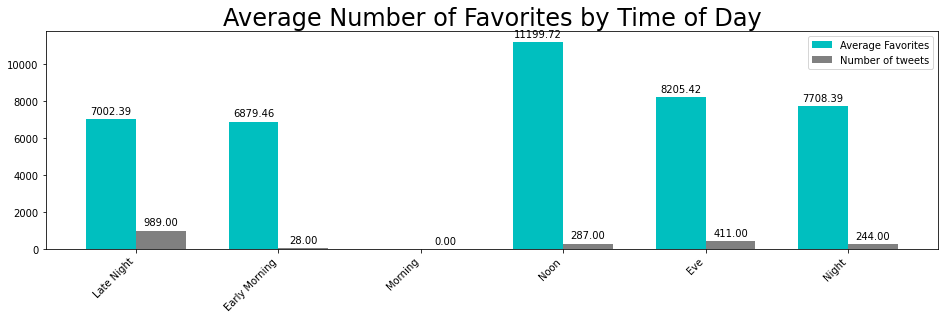

In [114]:
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
## as guidance in buildling the bar charts

fig, ax = plt.subplots()

x = np.arange(len(l))
width = .35

fav_avg = ax.bar(x=x - width/2, height=hourly_fav_count_stats['mean'].values, width=width, label='Average Favorites', color = 'c')
fav_ct = ax.bar(x=x + width/2, height=hourly_fav_count_stats['count'].values, width=width, label='Number of tweets', color= 'grey')

ax.set_xticks(x)
ax.set_xticklabels(l, rotation=45, ha='right')
ax.set_title('Average Number of Favorites by Time of Day', size =24)
ax.legend()

def autolabel(axes):
    for y in axes:
        height = y.get_height()
        ax.annotate('{0:.{1}f}'.format(height, 2),
                    xy=(y.get_x() + y.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(fav_avg)
autolabel(fav_ct)

fig.set_size_inches(16,4)
    
plt.show();

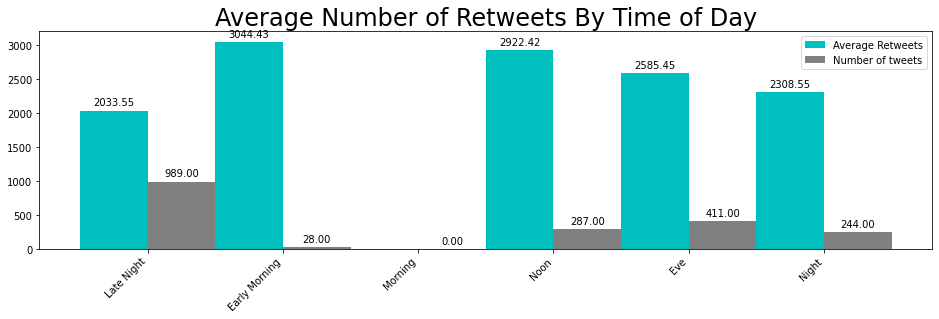

In [118]:
fig, ax = plt.subplots()

rt_avg = ax.bar(x=x - width/2, height=hourly_rt_count_stats['mean'].values, width=width, color='c', 
                label='Average Retweets')
rt_ct = ax.bar(x=x + width/2, height=hourly_rt_count_stats['count'].values, width=width, color='grey',
               label='Number of tweets')

ax.set_xticks(x)
ax.set_xticklabels(l, rotation=45, ha='right')
ax.set_title('Average Number of Retweets By Time of Day', size =24)
ax.legend()

autolabel(rt_avg)
autolabel(rt_ct)

fig.set_size_inches(16,4)

plt.show();

While we can see that the account mostly tweets late at night, it is the tweets in the early morning that get the highest average number of retweets, and posts at noon that get the highest average number of favorites. Naturally this does not tell us much about the behavior of those following the account as those retweets and favorites can take days to accumulate. What's just as fascinating however is there are no tweets in he morning period (from 8 am to 12 pm) at all!!

